In [3]:
#import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
# Load the Excel file
df = pd.read_excel("cultural events.xlsx", sheet_name="Sheet1")

In [4]:
# Display the data set
print(df.head())
print(df.tail())

            Timestamp              Name     Roll No                email id  \
0 2025-01-24 17:13:16           Dharani  249XA05163  249XA05163@gprec.ac.in   
1 2025-01-24 20:06:53         Keerthika  249xa05152  249xa05152@gprec.ac.in   
2 2025-01-24 21:26:39     Kesu Suchitra  249xa05136  249xa05136@gprec.ac.in   
3 2025-01-28 23:08:23        S. Mufliha  249xa05280  249xa05280@gprec.ac.in   
4 2025-01-28 23:22:30  S. Fayaz Hussain  249XA05302  249XA05302@gprec.ac.in   

   Mobile No.    Year Branch Section  event Name  
0  9440667895  I Year    CSE       C  Bull's eye  
1  9392814834  I Year    CSE       C  Bull's eye  
2  8688476037  I Year    CSE       C  Bull's eye  
3  7729927440  I Year    CSE       e  Bull's eye  
4  9701488158  I Year    CSE       e  Bull's eye  
              Timestamp                Name     Roll No  \
395 2025-01-24 12:09:55  M. Lakshmi Kushala  249xa33092   
396 2025-01-24 20:03:43                Raju  239x5a2867   
397 2025-01-24 22:57:55         B.N.Sandhy

In [5]:
#Data Manipulations
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Timestamp   400 non-null    datetime64[ns]
 1   Name        400 non-null    object        
 2   Roll No     400 non-null    object        
 3   email id    399 non-null    object        
 4   Mobile No.  398 non-null    object        
 5   Year        400 non-null    object        
 6   Branch      400 non-null    object        
 7   Section     400 non-null    object        
 8   event Name  400 non-null    object        
dtypes: datetime64[ns](1), object(8)
memory usage: 28.3+ KB
None
                           Timestamp
count                            400
mean      2025-01-18 13:53:03.880000
min              2025-01-04 18:46:07
25%    2025-01-07 23:02:12.750000128
50%       2025-01-22 19:07:46.500000
75%    2025-01-24 17:34:15.249999872
max              2025-01-29 13:33:39


In [6]:
#Drop unnecessary columns
df1=df.drop(columns=["Name","Roll No","email id","Mobile No."])
df1

,Timestamp,Year,Branch,Section,event Name
0,2025-01-24 17:13:16,I Year,CSE,C,Bull's eye
1,2025-01-24 20:06:53,I Year,CSE,C,Bull's eye
2,2025-01-24 21:26:39,I Year,CSE,C,Bull's eye
3,2025-01-28 23:08:23,I Year,CSE,e,Bull's eye
4,2025-01-28 23:22:30,I Year,CSE,e,Bull's eye
...,...,...,...,...,...
395,2025-01-24 12:09:55,I Year,CSM,B,Singing(Solo)
396,2025-01-24 20:03:43,III Year,CST,A,Singing(Solo)
397,2025-01-24 22:57:55,II Year,CSE,C,Singing(Solo)
398,2025-01-25 02:17:59,II Year,CSM,B,Singing(Solo)


In [7]:
#handling Missing Values
df1.dropna().head()

,Timestamp,Year,Branch,Section,event Name
0,2025-01-24 17:13:16,I Year,CSE,C,Bull's eye
1,2025-01-24 20:06:53,I Year,CSE,C,Bull's eye
2,2025-01-24 21:26:39,I Year,CSE,C,Bull's eye
3,2025-01-28 23:08:23,I Year,CSE,e,Bull's eye
4,2025-01-28 23:22:30,I Year,CSE,e,Bull's eye


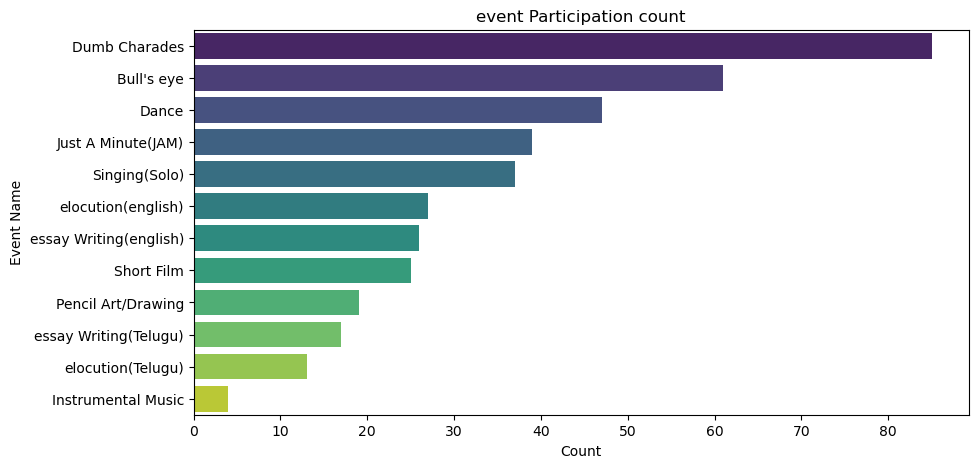

In [8]:
#Visualization of the dataset across individual event participations using bargraphs
plt.figure(figsize=(10,5))
sns.countplot(y=df['event Name'], order=df['event Name'].value_counts().index, palette='viridis')
plt.title('event Participation count')
plt.xlabel('Count')
plt.ylabel('Event Name')
plt.show()

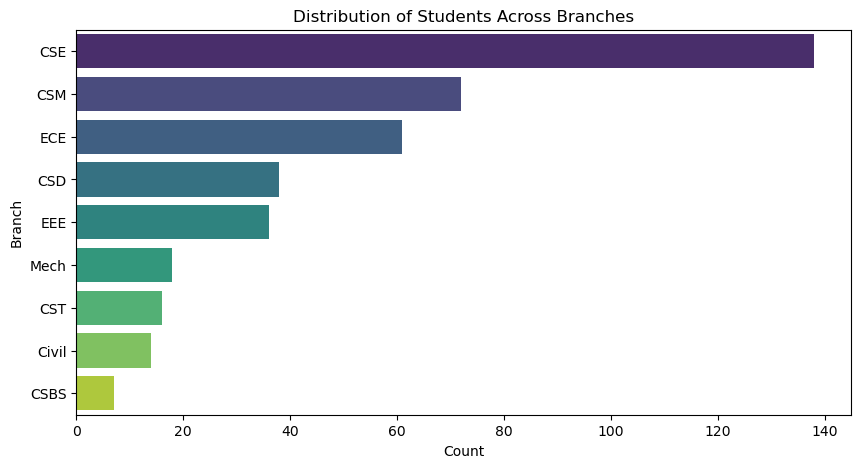

In [9]:
#Students Participations across different Branches in College
plt.figure(figsize=(10,5))
sns.countplot(y=df['Branch'], order=df['Branch'].value_counts().index, palette='viridis')
plt.title('Distribution of Students Across Branches')
plt.xlabel('Count')
plt.ylabel('Branch')
plt.show()

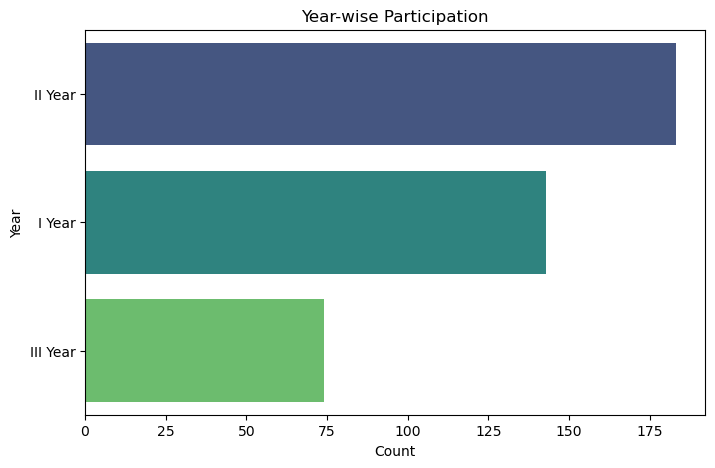

In [10]:
#No of Registrations overall all years
plt.figure(figsize=(8,5))
sns.countplot(y=df['Year'], order=df['Year'].value_counts().index, palette='viridis')
plt.title('Year-wise Participation')
plt.xlabel('Count')
plt.ylabel('Year')
plt.show()

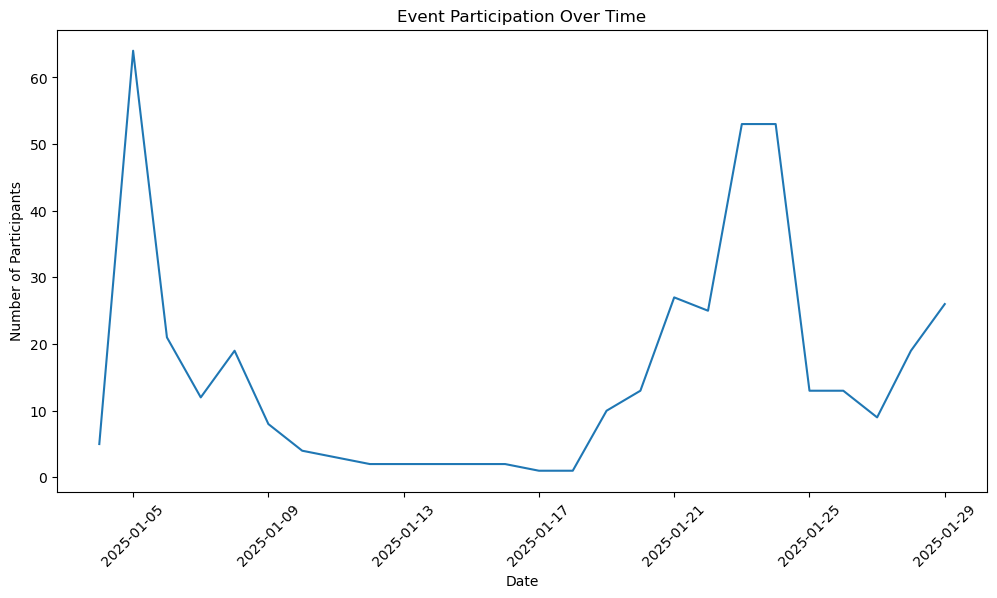

In [11]:
#Registration counts of events between 5 january to 29 january
plt.figure(figsize=(12, 6))
df.groupby(df['Timestamp'].dt.date)['event Name'].count().plot()
plt.title("Event Participation Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Participants")
plt.xticks(rotation=45)
plt.show()

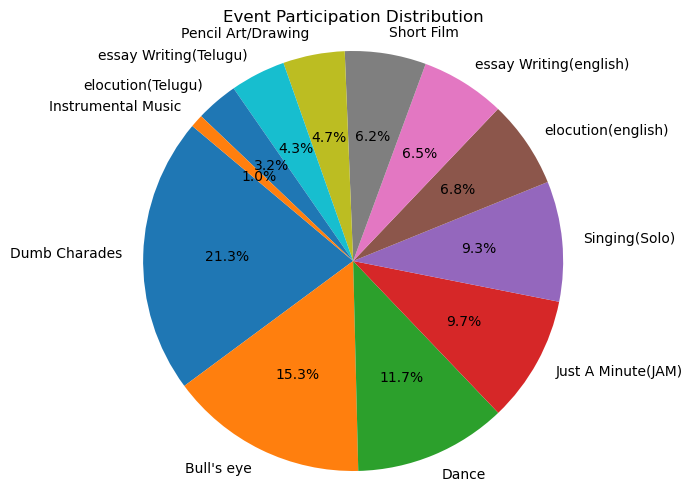

In [12]:
#Overall Event Participantions percentage 
plt.figure(figsize=(7,6))
event_counts = df["event Name"].value_counts()
plt.pie(event_counts, labels=event_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Event Participation Distribution")
plt.axis('equal')
plt.show()

In [13]:
#Machine Learning algorithms applied to dataset
label_encoders = {}
for col in ["Timestamp","Year", "Branch", "Section", "event Name"]:
    le = LabelEncoder()
    df1[col] = le.fit_transform(df1[col])
    label_encoders[col] = le  # Save encoders for later decoding

In [14]:
#Define features and target variable
X = df1[["Timestamp","Year", "Branch", "Section"]]
y = df1["event Name"]

In [15]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Train and evaluate the data with multiple models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=200)
}
results={}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"{name} Accuracy: {accuracy:.2f}")
    print(classification_report(y_test, y_pred))

Random Forest Accuracy: 0.49
              precision    recall  f1-score   support

           0       0.75      0.75      0.75        16
           1       0.62      0.67      0.64        12
           2       0.62      0.53      0.57        15
           3       0.00      0.00      0.00         1
           4       0.20      0.67      0.31         3
           5       1.00      0.33      0.50         3
           6       0.33      0.25      0.29         4
           7       0.40      0.36      0.38        11
           8       0.33      0.20      0.25         5
           9       0.00      0.00      0.00         3
          10       0.00      0.00      0.00         5
          11       0.33      1.00      0.50         2

    accuracy                           0.49        80
   macro avg       0.38      0.40      0.35        80
weighted avg       0.50      0.49      0.48        80

Decision Tree Accuracy: 0.46
              precision    recall  f1-score   support

           0       0

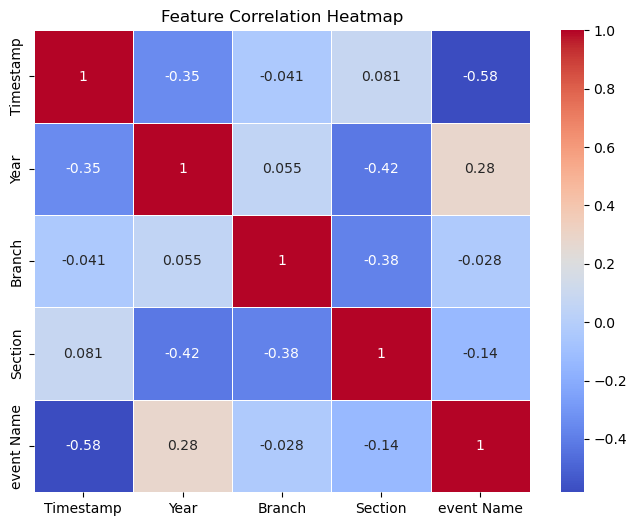

In [17]:
#Visualization of heatmap for the event prediction
plt.figure(figsize=(8, 6))
sns.heatmap(df1.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


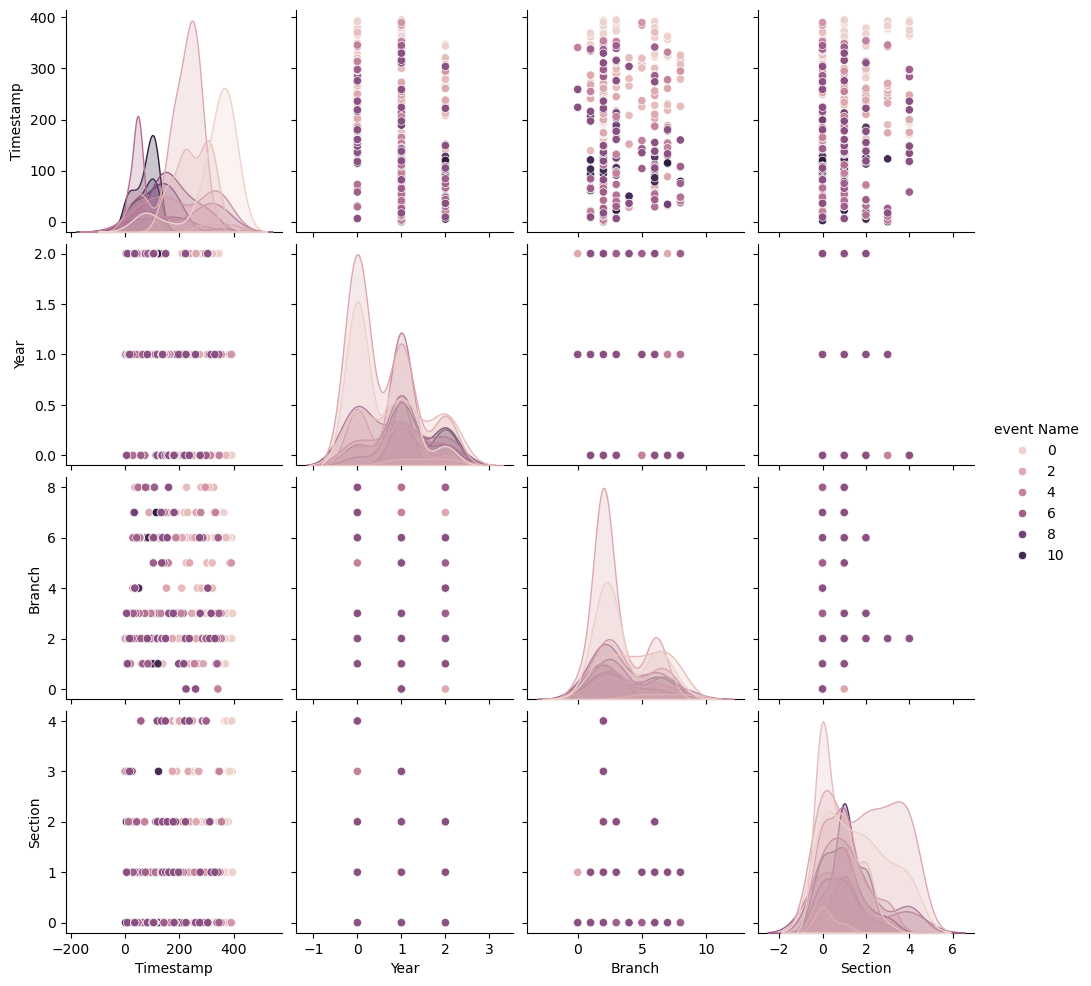

In [21]:
sns.pairplot(df1, hue="event Name")
plt.show()

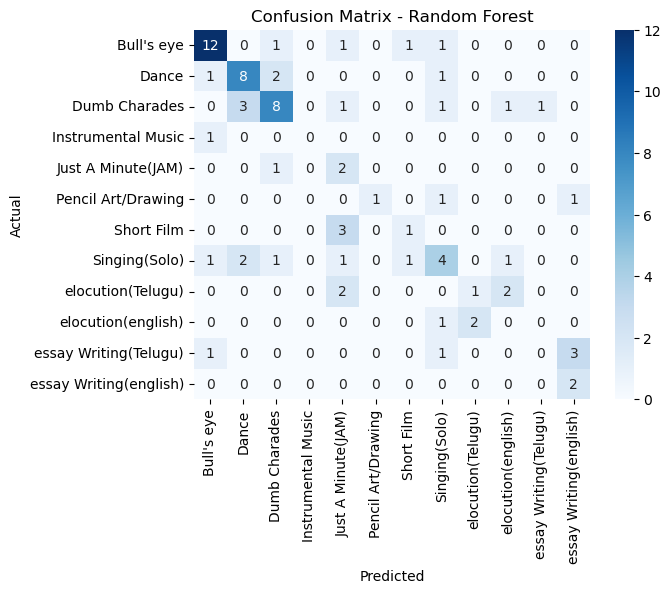

In [22]:
# Confusion matrix for the best model
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
y_pred_best = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoders["event Name"].classes_, yticklabels=label_encoders["event Name"].classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix - {best_model_name}")
plt.show()